In [263]:
!pip install pyspark

In [264]:
from pyspark.sql import functions as f
from pyspark.sql import SparkSession as ss
from pyspark.sql.functions import date_format, to_date, date_format

In [265]:
spark = ss.builder.appName("DataFrame_PF").getOrCreate()

In [266]:
#Importando data frame sobre a violencia com armas nos Estados Unidos
url = "/content/drive/MyDrive/Dataset/Violencia_com_armas_eua/updated_with_coordinates.csv"
vi = spark.read.csv(
    url,
    header = True,
    inferSchema = True,
    sep = ","
)

In [267]:
vi.show()

+-----------+------------------+--------------------+--------------------+--------------------+--------------+---------------+---------------+----------------+-----------------+----------+--------+----------+-----------------+
|Incident ID|     Incident Date|               State|      City Or County|             Address|Victims Killed|Victims Injured|Suspects Killed|Suspects Injured|Suspects Arrested|Operations|Latitude| Longitude|Coordinates_Found|
+-----------+------------------+--------------------+--------------------+--------------------+--------------+---------------+---------------+----------------+-----------------+----------+--------+----------+-----------------+
|    3052758|  October 21, 2024|          Washington|           Fall City|7700 block of Lak...|             5|              1|              0|               0|                1|      NULL|47.56812|-121.89086|              Yes|
|    3052028|  October 20, 2024|           Tennessee|             Jackson| 2310 N Highland A

In [268]:
vi.printSchema()

root
 |-- Incident ID: integer (nullable = true)
 |-- Incident Date: string (nullable = true)
 |-- State: string (nullable = true)
 |-- City Or County: string (nullable = true)
 |-- Address: string (nullable = true)
 |-- Victims Killed: integer (nullable = true)
 |-- Victims Injured: integer (nullable = true)
 |-- Suspects Killed: integer (nullable = true)
 |-- Suspects Injured: integer (nullable = true)
 |-- Suspects Arrested: integer (nullable = true)
 |-- Operations: string (nullable = true)
 |-- Latitude: double (nullable = true)
 |-- Longitude: double (nullable = true)
 |-- Coordinates_Found: string (nullable = true)



In [269]:
# renomeando colunas
vi = vi.withColumnsRenamed(
    {
        "Incident ID": "ID_incidente",
        "Incident Date": "data_incidente",
        "State": "estado",
        "City Or County": "cidade_pais",
        "Address": "endereco",
        "Victims Killed": "vitimas_mortas",
        "Victims Injured": "vitimas_feridas",
        "Suspects Killed": "suspeitos_mortos",
        "Suspects Injured": "suspeitos_feridos",
        "Suspects Arrested": "suspeitos_presos",
        "Operations": "operacoes",
        "Latitude": "latitude",
        "Longitude": "longitude",
        "Coordinates_Found": "coordenadas_encontradas"
    }
)

### **Tratando valores nulos**

In [270]:
vi = vi.na.fill({
    "operacoes": "Sem Dados"
})

### **Tratando os dados da coluna data_incidente**


In [271]:
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", ",", " "))

In [272]:
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "January", "1"))
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "February", "2"))
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "March", "3"))
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "April", "4"))
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "May", "5"))
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "June", "6"))
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "July", "7"))
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "August", "8"))
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "September", "9"))
vi = vi.withColumn("data_incidente", f.regexp_replace("data_incidente", "October", "10"))

In [273]:
vi.show()

+------------+--------------+--------------------+--------------------+--------------------+--------------+---------------+----------------+-----------------+----------------+---------+--------+----------+-----------------------+
|ID_incidente|data_incidente|              estado|         cidade_pais|            endereco|vitimas_mortas|vitimas_feridas|suspeitos_mortos|suspeitos_feridos|suspeitos_presos|operacoes|latitude| longitude|coordenadas_encontradas|
+------------+--------------+--------------------+--------------------+--------------------+--------------+---------------+----------------+-----------------+----------------+---------+--------+----------+-----------------------+
|     3052758|   10 21  2024|          Washington|           Fall City|7700 block of Lak...|             5|              1|               0|                0|               1|Sem Dados|47.56812|-121.89086|                    Yes|
|     3052028|   10 20  2024|           Tennessee|             Jackson| 2310 N H

### **Alterando a coluna data_incidente para o tipo date**

In [274]:
spark.conf.set("spark.sql.legacy.timeParserPolicy", "LEGACY") #Forçando o modo de compatibilidade com o analisador de data legado, dessa forma não ocorre mais erro de versão
#vi.withColumn("data_incidente", f.to_date("data_incidente", "MM dd yyyy")).show()
vi = vi.withColumn("data_incidente", f.to_date("data_incidente", "MM dd yyyy"))

In [275]:
vi.printSchema()

root
 |-- ID_incidente: integer (nullable = true)
 |-- data_incidente: date (nullable = true)
 |-- estado: string (nullable = true)
 |-- cidade_pais: string (nullable = true)
 |-- endereco: string (nullable = true)
 |-- vitimas_mortas: integer (nullable = true)
 |-- vitimas_feridas: integer (nullable = true)
 |-- suspeitos_mortos: integer (nullable = true)
 |-- suspeitos_feridos: integer (nullable = true)
 |-- suspeitos_presos: integer (nullable = true)
 |-- operacoes: string (nullable = false)
 |-- latitude: double (nullable = true)
 |-- longitude: double (nullable = true)
 |-- coordenadas_encontradas: string (nullable = true)



In [276]:
vi.show()

+------------+--------------+--------------------+--------------------+--------------------+--------------+---------------+----------------+-----------------+----------------+---------+--------+----------+-----------------------+
|ID_incidente|data_incidente|              estado|         cidade_pais|            endereco|vitimas_mortas|vitimas_feridas|suspeitos_mortos|suspeitos_feridos|suspeitos_presos|operacoes|latitude| longitude|coordenadas_encontradas|
+------------+--------------+--------------------+--------------------+--------------------+--------------+---------------+----------------+-----------------+----------------+---------+--------+----------+-----------------------+
|     3052758|    2024-10-21|          Washington|           Fall City|7700 block of Lak...|             5|              1|               0|                0|               1|Sem Dados|47.56812|-121.89086|                    Yes|
|     3052028|    2024-10-20|           Tennessee|             Jackson| 2310 N H

# **Utilizando biblioteca pandas**

In [277]:
import pandas as pd
import matplotlib.pyplot as plt

### Sera usado a versão do dataset com os dados ja tratados

In [278]:
#url = "/content/drive/MyDrive/Dataset/Violencia_com_armas_eua/vi_pandas.csv"
#vi.write.csv(
#    url,
#    header=True,
#    mode="overwrite"
#)

In [304]:
url_csv = "/content/drive/MyDrive/Dataset/Violencia_com_armas_eua/vi_pandas.csv/part-00000-60fb59a1-2f96-40a2-95a4-c75e04f1f458-c000.csv"
vi_panda = pd.read_csv(url_csv)

In [ ]:
vi_panda

# Criando Analises do DataSet

In [281]:
vi.createOrReplaceTempView("v_vi")

### Distribuição geografica de vítimas mortas de acordo com o estado

In [ ]:
#Analise em Pyspark
spark.sql(
"""
SELECT ESTADO, COUNT(vitimas_mortas) as Vitimas_Mortas from v_vi
GROUP BY ESTADO
ORDER BY Vitimas_Mortas DESC
"""
).toPandas()

Criação do Grafico

In [283]:
g_geo_vit = vi_panda.groupby('estado')[['vitimas_mortas']].count().rename(columns={'vitimas_mortas': 'Vitimas_Mortas'}).reset_index().sort_values(by='Vitimas_Mortas', ascending=False)

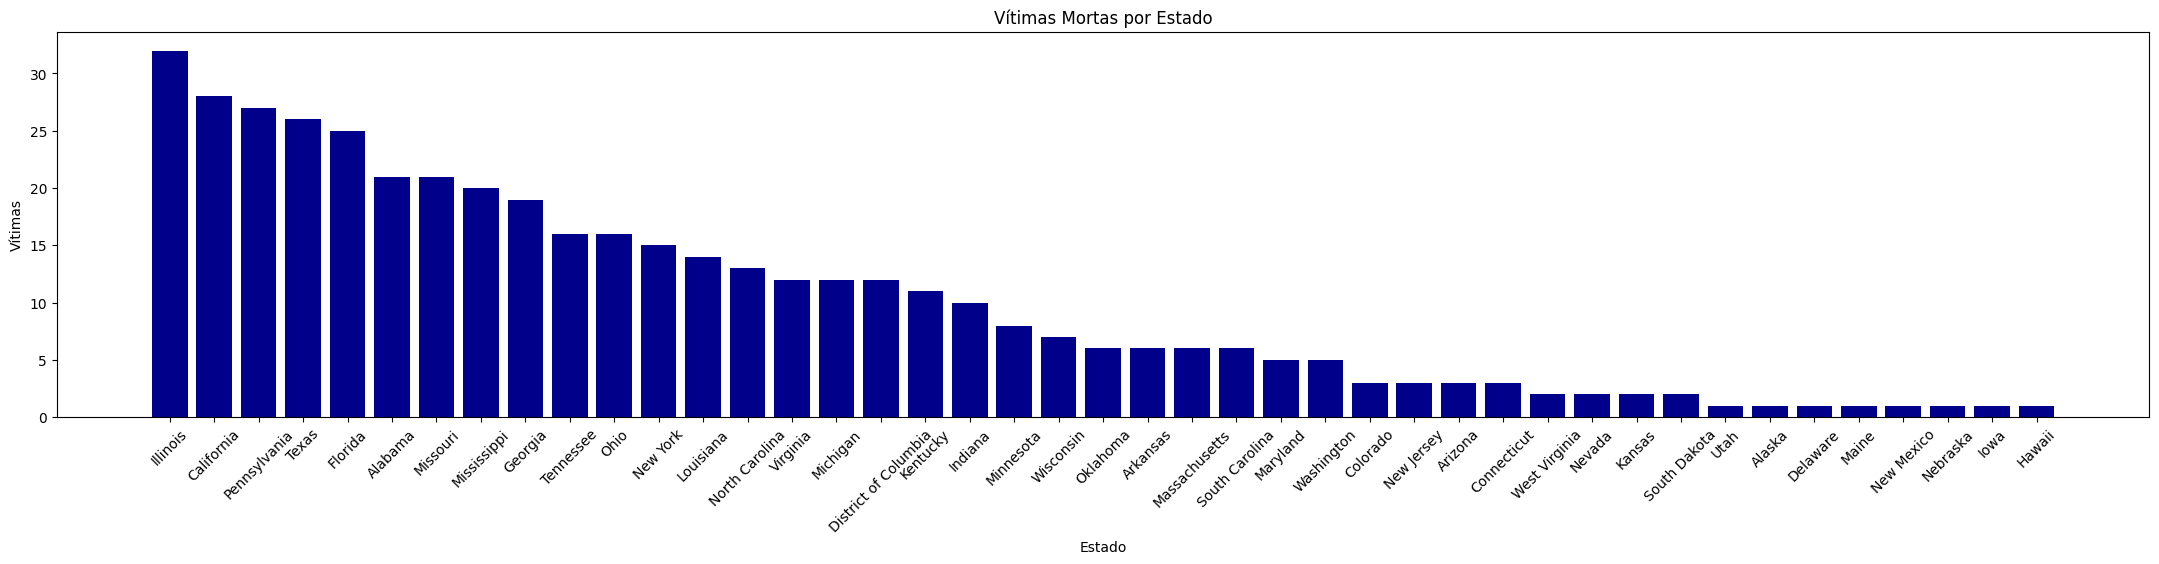

In [284]:
plt.figure(figsize=(27, 5))
plt.bar(g_geo_vit['estado'], g_geo_vit['Vitimas_Mortas'], color='darkblue')
plt.xlabel('Estado')
plt.ylabel('Vítimas')
plt.title('Vítimas Mortas por Estado')
plt.xticks(rotation=45)
plt.show()

### Analise de incidentes ocorridos ao longo dos meses

In [285]:
#Analise em Pyspark
spark.sql(
"""
SELECT
  CASE
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-01' THEN 'Janeiro'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-02' THEN 'Fevereiro'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-03' THEN 'Março'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-04' THEN 'Abril'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-05' THEN 'Maio'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-06' THEN 'Junho'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-07' THEN 'Julho'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-08' THEN 'Agosto'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-09' THEN 'Setembro'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') = '2024-10' THEN 'Outubro'
  END AS Meses,
  SUM(vitimas_mortas + vitimas_feridas) AS Vitimas
FROM v_vi
GROUP BY Meses
ORDER BY Meses

"""
).toPandas()

,Meses,Vitimas
0,Abril,206
1,Agosto,245
2,Fevereiro,145
3,Janeiro,180
4,Julho,359
5,Junho,430
6,Maio,264
7,Março,177
8,Outubro,120
9,Setembro,196


Criação do Grafico

In [286]:
vi_panda['data_incidente'] = pd.to_datetime(vi_panda['data_incidente'])
vi_panda['Meses'] = vi_panda['data_incidente'].dt.month_name()
month_mapping = { 'January': 'Janeiro', 'February': 'Fevereiro', 'March': 'Março',
                 'April': 'Abril', 'May': 'Maio', 'June': 'Junho', 'July': 'Julho',
                  'August': 'Agosto', 'September': 'Setembro', 'October': 'Outubro',
                  'November': 'Novembro', 'December': 'Dezembro' }
vi_panda['Meses'] = vi_panda['Meses'].map(month_mapping)
month_order = ['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro']
vi_panda['Meses'] = pd.Categorical(vi_panda['Meses'], categories=month_order, ordered=True)
vi_panda['Vitimas'] = vi_panda['vitimas_mortas'] + vi_panda['vitimas_feridas']
g_data_vit = vi_panda.groupby('Meses')[['Vitimas']].sum().reset_index()

<ipython-input-286-aae23455c809>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g_data_vit = vi_panda.groupby('Meses')[['Vitimas']].sum().reset_index()


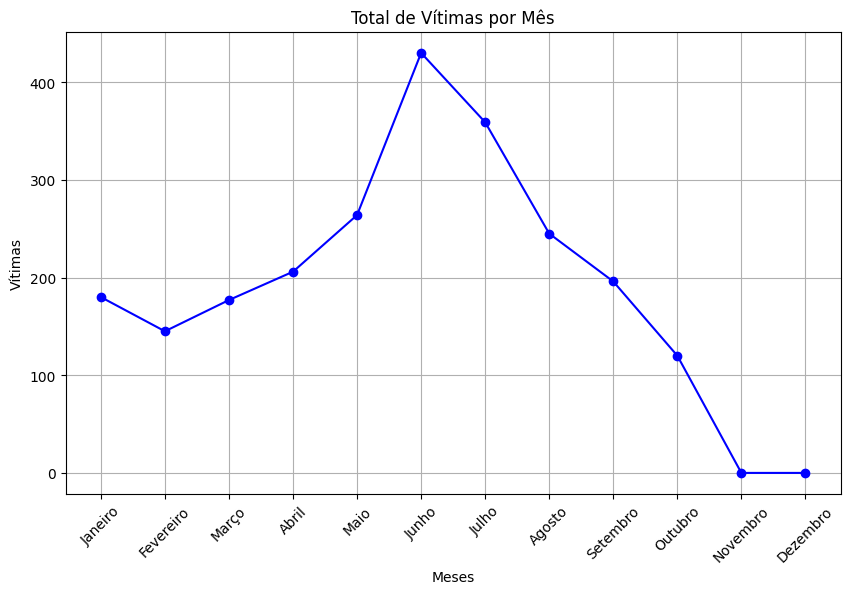

In [287]:
plt.figure(figsize=(10, 6))
plt.plot(g_data_vit['Meses'], g_data_vit['Vitimas'], marker='o', linestyle='-', color='blue')
plt.xlabel('Meses')
plt.ylabel('Vítimas')
plt.title('Total de Vítimas por Mês')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Tendência sazonal de incidentes, verificando se a um aumento ou uma diminuição dos crimes em uma estação especifica

In [288]:
#Analise em Pyspark
spark.sql(
"""
SELECT
  CASE
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') BETWEEN '2024-06' AND '2024-08' THEN 'Verão'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') BETWEEN '2024-09' AND '2024-11' THEN 'Outono'
    WHEN DATE_FORMAT(data_incidente, 'YYYY-MM') BETWEEN '2024-03' AND '2024-05' THEN 'Primavera'
    ELSE 'Inverno'
  END AS Estacao,
  COUNT(*) AS Incidentes
FROM v_vi
GROUP BY Estacao
ORDER BY Incidentes DESC

"""
).toPandas()

,Estacao,Incidentes
0,Verão,186
1,Primavera,123
2,Inverno,65
3,Outono,53


`Criação do Grafico`

In [289]:
vi_panda['data_incidente'] = pd.to_datetime(vi_panda['data_incidente'])
def estacao(data):
  if data.month in [12, 1, 2]:
    return 'Inverno'
  elif data.month in [3, 4, 5]:
    return 'Primavera'
  elif data.month in [6, 7, 8]:
    return 'Verão'
  else:
    return 'Outono'
vi_panda['Estacao'] = vi_panda['data_incidente'].apply(estacao)
g_est_inc = vi_panda.groupby('Estacao').size().reset_index(name='Incidentes').sort_values(by='Incidentes', ascending=False)

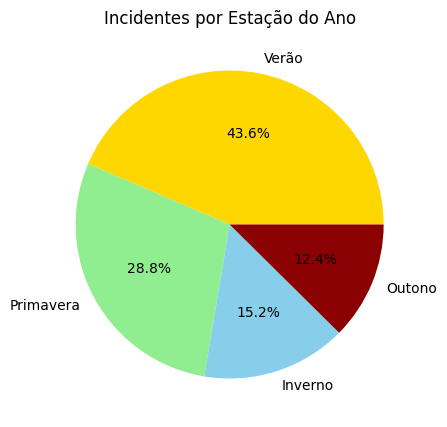

In [290]:
plt.figure(figsize=(5, 5))
plt.pie(g_est_inc['Incidentes'], labels=g_est_inc['Estacao'], autopct='%1.1f%%', colors=['gold', 'lightgreen', 'skyblue', 'darkred'])
plt.title('Incidentes por Estação do Ano')
plt.show()

### Analisando a distribuição de incidentes do estado com o maior número de crimes

In [291]:
#Analise em Pyspark
spark.sql(
"""
SELECT cidade_pais AS CIDADES, COUNT(*) AS INCIDENTES FROM v_vi
WHERE estado = "Illinois"
GROUP BY cidade_pais
ORDER BY INCIDENTES DESC
"""
).toPandas()

,CIDADES,INCIDENTES
0,Chicago,25
1,Maywood,1
2,Oak Forest,1
3,Tinley Park,1
4,Pembroke Township,1
5,Champaign,1
6,Joliet,1
7,Forest Park,1


Criação do Grafico

In [292]:
g_cid_inc = vi_panda.query("estado == 'Illinois'").groupby("cidade_pais").size().reset_index(name="INCIDENTES").sort_values(by="INCIDENTES", ascending=False)

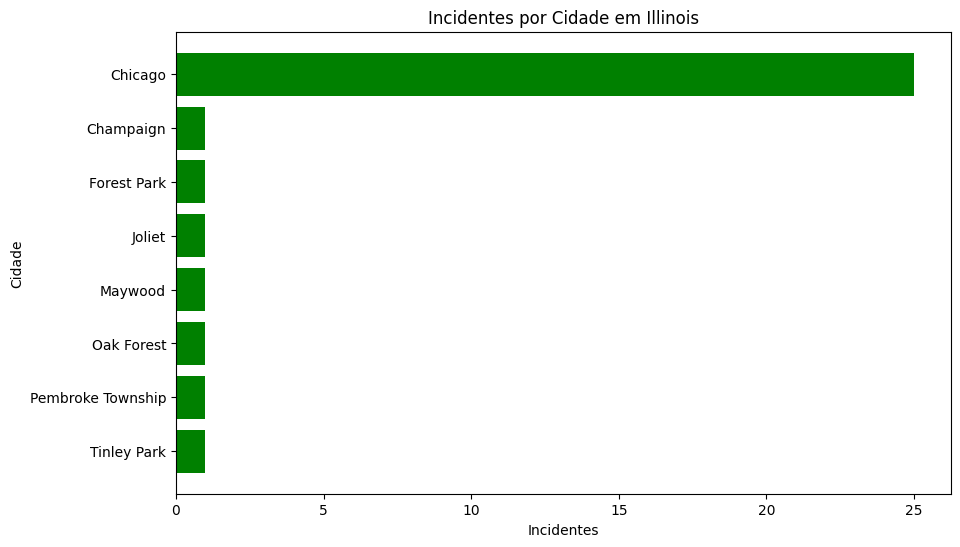

In [293]:
plt.figure(figsize=(10, 6))
plt.barh(g_cid_inc['cidade_pais'], g_cid_inc['INCIDENTES'], color='green')
plt.xlabel('Incidentes')
plt.ylabel('Cidade')
plt.title('Incidentes por Cidade em Illinois')
plt.gca().invert_yaxis()
plt.show()

### Analisando a efetividade policial por estado comparando ocorrências e prisões feitas

In [294]:
#Analise em Pyspark
spark.sql(
"""
SELECT
    ESTADO,
    COUNT(*) AS Ocorrencias,
    SUM(suspeitos_presos) AS Prisoes,
    CASE
        WHEN SUM(suspeitos_presos) > COUNT(*) AND SUM(suspeitos_presos) < 20 THEN 'Atuação Eficiente'
        WHEN SUM(suspeitos_presos) > COUNT(*) AND SUM(suspeitos_presos) >= 20 THEN 'Atuação Eficiente, mas alto índice de crimes'
        WHEN SUM(suspeitos_presos) < COUNT(*) THEN 'Atuação pouco Eficiente'
        ELSE 'Atuação regular'
    END AS Eficiencia_Policial
FROM v_vi
GROUP BY ESTADO
ORDER BY Prisoes DESC

"""
).toPandas()

,ESTADO,Ocorrencias,Prisoes,Eficiencia_Policial
0,California,28,33,"Atuação Eficiente, mas alto índice de crimes"
1,Texas,26,31,"Atuação Eficiente, mas alto índice de crimes"
2,Georgia,19,27,"Atuação Eficiente, mas alto índice de crimes"
3,Florida,25,23,Atuação pouco Eficiente
4,Missouri,21,18,Atuação pouco Eficiente
5,Mississippi,20,18,Atuação pouco Eficiente
6,Alabama,21,17,Atuação pouco Eficiente
7,Pennsylvania,27,16,Atuação pouco Eficiente
8,Tennessee,16,14,Atuação pouco Eficiente
9,Illinois,32,11,Atuação pouco Eficiente


## **Criando outros dataframes apartir de consultas**

In [295]:
# usando a consulta de efetividade policial
df_efetivo = spark.sql(
"""
SELECT
    ESTADO,
    COUNT(*) AS Ocorrencias,
    SUM(suspeitos_presos) AS Prisoes,
    CASE
        WHEN SUM(suspeitos_presos) > COUNT(*) AND SUM(suspeitos_presos) < 20 THEN 'Atuação Eficiente'
        WHEN SUM(suspeitos_presos) > COUNT(*) AND SUM(suspeitos_presos) >= 20 THEN 'Atuação Eficiente, mas alto índice de crimes'
        WHEN SUM(suspeitos_presos) < COUNT(*) THEN 'Atuação pouco Eficiente'
        ELSE 'Atuação regular'
    END AS Eficiencia_Policial
FROM v_vi
GROUP BY ESTADO
ORDER BY Prisoes DESC

"""
)

### Salvando data frame em arquivo .orc

In [296]:
url = "/content/drive/MyDrive/Dataset/Violencia_com_armas_eua/Saida/df_orc.orc"
df_efetivo.coalesce(1).write.orc(
    url,
    mode="overwrite"
)

In [297]:
url = "/content/drive/MyDrive/Dataset/Violencia_com_armas_eua/Saida/df_orc.orc"
df_efetico_orc = spark.read.orc(
    url
)

In [298]:
df_efetico_orc.show()

+--------------+-----------+-------+--------------------+
|        ESTADO|Ocorrencias|Prisoes| Eficiencia_Policial|
+--------------+-----------+-------+--------------------+
|    California|         28|     33|Atuação Eficiente...|
|         Texas|         26|     31|Atuação Eficiente...|
|       Georgia|         19|     27|Atuação Eficiente...|
|       Florida|         25|     23|Atuação pouco Efi...|
|      Missouri|         21|     18|Atuação pouco Efi...|
|   Mississippi|         20|     18|Atuação pouco Efi...|
|       Alabama|         21|     17|Atuação pouco Efi...|
|  Pennsylvania|         27|     16|Atuação pouco Efi...|
|     Tennessee|         16|     14|Atuação pouco Efi...|
|      Illinois|         32|     11|Atuação pouco Efi...|
|       Indiana|         10|      9|Atuação pouco Efi...|
|      Arkansas|          6|      8|   Atuação Eficiente|
|          Ohio|         16|      7|Atuação pouco Efi...|
|      Oklahoma|          6|      7|   Atuação Eficiente|
|       Arizon

### Salvando data frame em arquivo .csv

In [299]:
url = "/content/drive/MyDrive/Dataset/Violencia_com_armas_eua/Saida/df_csv.csv"
df_efetivo.coalesce(1).write.csv(
    url,
    header=True,
    mode="overwrite"
)

In [300]:
url = "/content/drive/MyDrive/Dataset/Violencia_com_armas_eua/Saida/df_csv.csv"
df_efetivo_csv = spark.read.csv(
    url,
    header = True,
    inferSchema = True,
    sep = ","
)

In [301]:
df_efetivo_csv.show()

+--------------+-----------+-------+--------------------+
|        ESTADO|Ocorrencias|Prisoes| Eficiencia_Policial|
+--------------+-----------+-------+--------------------+
|    California|         28|     33|Atuação Eficiente...|
|         Texas|         26|     31|Atuação Eficiente...|
|       Georgia|         19|     27|Atuação Eficiente...|
|       Florida|         25|     23|Atuação pouco Efi...|
|      Missouri|         21|     18|Atuação pouco Efi...|
|   Mississippi|         20|     18|Atuação pouco Efi...|
|       Alabama|         21|     17|Atuação pouco Efi...|
|  Pennsylvania|         27|     16|Atuação pouco Efi...|
|     Tennessee|         16|     14|Atuação pouco Efi...|
|      Illinois|         32|     11|Atuação pouco Efi...|
|       Indiana|         10|      9|Atuação pouco Efi...|
|      Arkansas|          6|      8|   Atuação Eficiente|
|          Ohio|         16|      7|Atuação pouco Efi...|
|      Oklahoma|          6|      7|   Atuação Eficiente|
|       Arizon